# <center>Practice 7 - Intelligent Systems</center>
## Types of stars

#### Alvaro Bryan Cori Sanchez
#### Mauricio Balderrama Ali

![Types](images/TypesStars.jpg)
Ref.- [VectorStock](https://www.vectorstock.com/royalty-free-vector/diagram-showing-different-types-stars-vector-29444775)


In [66]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from tensorflow.keras import metrics
from tensorflow.keras import optimizers
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder

from clean_variables import *
from select_variables import *

import csv 
import pandas as pd
import random
import matplotlib.pyplot as plt

seed = 7
numpy.random.seed(seed)

# Data Inputs, data cleansing and data analysis

### Getting the data inputs

In the first step we get the data inputs from a .csv file where we recieve 7 columns, 6 for the x variable and 1 for the y variable 

In [67]:
stars = pd.read_csv("assignment_ds.csv")

In [68]:
stars

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3453,0.000621,0.07730,17.08,Red,M,0
1,12098,689.000000,7.01000,0.02,Blue-white,A,3
2,2731,0.000437,0.08560,18.09,Red,M,0
3,37800,202900.000000,6.86000,-4.56,Blue,O,3
4,8570,0.000810,0.00970,14.20,Blue white,A,2
...,...,...,...,...,...,...,...
195,13420,0.000590,0.00981,13.67,Blue White,B,2
196,19860,0.001100,0.01310,11.34,Blue,B,2
197,13023,998.000000,6.21000,-1.38,Blue-white,A,3
198,39000,204000.000000,10.60000,-4.70,Blue,O,3


#### Applying cleanliness to the data

2 columns of x variable are text and we will convert this type to a array of 0 and 1, first we filter the unique values and apply to lower a the colors column because some camps have upper letters that mark different for the similars texts that they don't have upper letters.

In [69]:
print(clean_colors(stars))
print(clean_spectral_classes(stars))

{'whitish', 'blue', 'yellowish white', 'white', 'pale yellow orange', 'blue white', 'red', 'yellowish', 'orange-red', 'white-yellow', 'yellow-white', 'orange', 'blue-white'}
{'M', 'K', 'G', 'F', 'A', 'B', 'O'}


We use this values for the variable x.

In [70]:
colors = ['whitish','red','pale yellow orange','white-yellow','blue','yellow-white','yellowish','yellowish white','orange-red','orange','white','blue white','blue-white']
spectral_classes = ['O', 'F', 'G', 'K', 'A', 'M', 'B']

#### Data Analysis

For the analysis we apply the covariance and correlation in order to observe the relationship that exists between the variables x and y, with the correlation being 0 the worst relationship and 1 or -1 the best relationship..
* The number columns can be applied for the analysis.
* The categories columns (texts) need be assigned a number for get the correlation.

In [71]:
stars_analysis = stars.copy()

In [72]:
stars_analysis['Number_Color']=ListCagetorietoNumber(stars_analysis.Color,colors)
stars_analysis['Numbr_Spectral_Class']=ListCagetorietoNumber(stars_analysis.Spectral_Class,spectral_classes)
stars_analysis

,Temperature,L,R,A_M,Color,Spectral_Class,Type,Number_Color,Numbr_Spectral_Class
0,3453,0.000621,0.07730,17.08,Red,M,0,1,5
1,12098,689.000000,7.01000,0.02,Blue-white,A,3,12,4
2,2731,0.000437,0.08560,18.09,Red,M,0,1,5
3,37800,202900.000000,6.86000,-4.56,Blue,O,3,4,0
4,8570,0.000810,0.00970,14.20,Blue white,A,2,11,4
...,...,...,...,...,...,...,...,...,...
195,13420,0.000590,0.00981,13.67,Blue White,B,2,11,6
196,19860,0.001100,0.01310,11.34,Blue,B,2,4,6
197,13023,998.000000,6.21000,-1.38,Blue-white,A,3,12,4
198,39000,204000.000000,10.60000,-4.70,Blue,O,3,4,0


### Covariance
Covariance is the value that reflects the amount by which any two variables vary jointly with respect to their arithmetic means. This measure allows us to know how the variables in question behave with respect to other variables.  
#### Covariance of the variables

The following table shows that:
* The star type depends on the Temperature variable in a proportional way.
* The star type depends on the variable L proportionally.
* The star type depends on the variable R in a proportional way.
* Star type depends on the variable A_M inversely proportionally.
* The star type depends on the variable Color proportionally.
* Star type depends on Spectral_Class variable inversely proportionally


In [73]:
cov_mat = stars_analysis.cov()
cov_mat= cov_mat.drop(['Temperature', 'L', 'R','A_M','Number_Color','Numbr_Spectral_Class'], axis=1)
cov_mat

,Type
Temperature,6428.207940
L,210878.875596
R,590.250620
A_M,-16.944131
Type,2.873467
Number_Color,1.534271
Numbr_Spectral_Class,-1.421407


### Correlation
Correlation is a type of association between two numerical variables, specifically it evaluates the trend (increasing or decreasing) in the data.

Two variables are associated when one variable gives us information about the other. Conversely, when there is no association, the increase or decrease of one variable tells us nothing about the behavior of the other variable.
![Types](images/correlation.png)
#### Correlation between the variables
The following table shows that:

* **Temperature**      : High Positive Correlation
* **L**                : High Positive Correlation
* **R**                : High Positive Correlation
* **A_M**	           : Perfect Negative Correlation
* **Color**            : Low Positive Correlation
* **Spectral_Class**   : Low Negative Correlation

In [74]:
corr_mat= stars_analysis.corr(method='spearman')
corr_mat=corr_mat.drop(['Temperature', 'L', 'R','A_M','Number_Color','Numbr_Spectral_Class'], axis=1)
corr_mat

,Type
Temperature,0.556591
L,0.846269
R,0.809410
A_M,-0.951591
Type,1.000000
Number_Color,0.319005
Numbr_Spectral_Class,-0.333179


#### Plots of correlations

R: 0.557


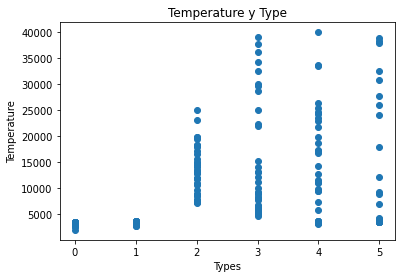

In [75]:
plt.scatter(stars_analysis['Type'],stars_analysis['Temperature'])
plt.title('Temperature y Type')
plt.xlabel("Types")
plt.ylabel("Temperature")
print('R:',corr_mat.iloc[0][0].round(3))

R: 0.846


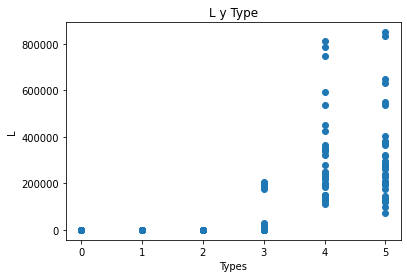

In [76]:
#Graficas de correlaciones
plt.scatter(stars_analysis['Type'],stars_analysis['L'])
plt.title('L y Type')
plt.xlabel("Types")
plt.ylabel("L")
print('R:',corr_mat.iloc[1][0].round(3))

R: 0.809


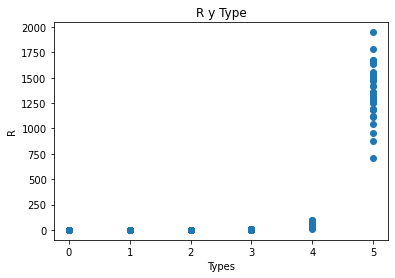

In [77]:
#Graficas de correlaciones
plt.scatter(stars_analysis['Type'],stars['R'])
plt.title('R y Type')
plt.xlabel("Types")
plt.ylabel("R")
print('R:',corr_mat.iloc[2][0].round(3))

R: -0.952


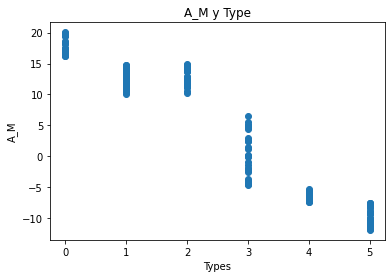

In [78]:
#Graficas de correlaciones
plt.scatter(stars_analysis['Type'],stars['A_M'])
plt.title('A_M y Type')
plt.xlabel("Types")
plt.ylabel("A_M")
print('R:',corr_mat.iloc[3][0].round(3))

R: 0.319


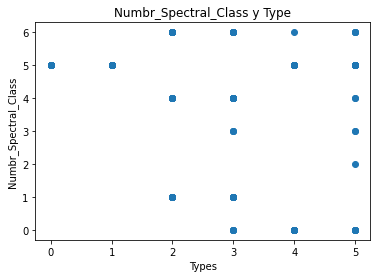

In [79]:
#Graficas de correlaciones
plt.scatter(stars_analysis['Type'],stars_analysis['Numbr_Spectral_Class'])
plt.title('Numbr_Spectral_Class y Type')
plt.xlabel("Types")
plt.ylabel("Numbr_Spectral_Class")
print('R:',corr_mat.iloc[5][0].round(3))

R: -0.333


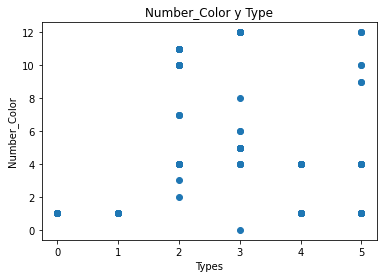

In [80]:
#Graficas de correlaciones
plt.scatter(stars_analysis['Type'],stars_analysis['Number_Color'])
plt.title('Number_Color y Type')
plt.xlabel("Types")
plt.ylabel("Number_Color")
print('R:',corr_mat.iloc[6][0].round(3))

## Aplication of the Neuronal Network

stars_inputs are the variable x and types is the variable y.
Then we select aleatory indexs of the dataset in order to assign differents values for the training and different values for the test. (Its guarantied that a row chosen by his index only can be part of the training or the test part).
We separate 160 rows for the training part, if we get 200 rows in a dataset, 40 rows are for the test part.

In this part we select the columns for variable x. we can exclude some variables for the correlation of this variables with the variable y. Sometimes the cases need only a pair of columns and in other cases the neuronal network can use with a high assert using all the columns of input. 

We mainly use two inputs:

* The function get_inputs use all the columns and need the dataset, unique values of colors and unique valors of spectral classes
* The function get_best_inputs use only Relative Luminosity (L), Relative Radius (R) and Absolute Magnitude (A_M).


##### Is important say that the correlation of the columns can variate depending of the csv of input.

### Now we apply a replication of experiment 3 (which was used for competition).

In [81]:
types = stars.iloc[:,-1]
#stars_inputs = get_best_inputs(stars)
stars_inputs = get_inputs(stars,colors, spectral_classes)
stars_inputs

,Temperature,L,R,A_M,whitish,red,pale yellow orange,white-yellow,blue,yellow-white,...,white,blue white,blue-white,O,F,G,K,A,M,B
0,3453,0.000621,0.07730,17.08,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,12098,689.000000,7.01000,0.02,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,2731,0.000437,0.08560,18.09,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,37800,202900.000000,6.86000,-4.56,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,8570,0.000810,0.00970,14.20,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,13420,0.000590,0.00981,13.67,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
196,19860,0.001100,0.01310,11.34,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
197,13023,998.000000,6.21000,-1.38,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
198,39000,204000.000000,10.60000,-4.70,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [82]:
index_list = rand_index(stars.shape[0])
x_train, y_train, x_test, y_test = select_variables(stars_inputs,types,index_list, 160)

In this part we build a neuronal network that have caps with dimentions ,number of neurones and function of activation, this camps might be variate for the differents results.
The compile have a optimizer of neurones, a function of loss and the metrics that can be used.

The first layer have the input layer and one hidden layer, the input layer must be have the same numbers of inputs for the columns of variable x, the number of neurones of hidden layers can be variate.

The last layer or output layer is an array of 0 and 1 that represent the type of output.

Types :

[0,1,2,3,4,5]

Domains for each type: 

[({0,1},{0,1},{0,1},{0,1},{0,1},{0,1}]

In [83]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((160, 24), (160,), (40, 24), (40,))

We use the best case with a function of activation "selu" and 3 layers.
Also we read that the function 'categorical_crossentropy' is well applied a categorical outputs for us classification.

In [84]:
model = Sequential()

model.add(Dense(10, input_dim=24, activation='selu'))
model.add(Dense(6, activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [85]:
#target_training
y = []
ls = []
y=IntegerEncode2(y_train)
target_test=IntegerEncode2(y_test)

For all experiments we use the a batch size of 64 and see the information about the epochs with verbose 1.

In [86]:
num_epochs=1482
history = model.fit(x_train, y,validation_data=(x_test, target_test), epochs=num_epochs,batch_size=64,verbose=1)


Epoch 1/1482
3/3 [==============================] - 1s 136ms/step - loss: 14027.8047 - accuracy: 0.3438 - val_loss: 17889.3809 - val_accuracy: 0.3750
Epoch 2/1482
3/3 [==============================] - 0s 25ms/step - loss: 13589.2520 - accuracy: 0.3438 - val_loss: 17276.3750 - val_accuracy: 0.3750
Epoch 3/1482
3/3 [==============================] - 0s 22ms/step - loss: 13126.5469 - accuracy: 0.3438 - val_loss: 16670.0684 - val_accuracy: 0.3750
Epoch 4/1482
3/3 [==============================] - 0s 25ms/step - loss: 12680.6670 - accuracy: 0.3438 - val_loss: 16068.1797 - val_accuracy: 0.3750
Epoch 5/1482
3/3 [==============================] - 0s 34ms/step - loss: 12207.8906 - accuracy: 0.3438 - val_loss: 15479.1855 - val_accuracy: 0.3750
Epoch 6/1482
3/3 [==============================] - 0s 45ms/step - loss: 11806.7549 - accuracy: 0.3438 - val_loss: 14878.1826 - val_accuracy: 0.3750
Epoch 7/1482
3/3 [==============================] - 0s 46ms/step - loss: 11329.3047 - accuracy: 0.3438 - 

3/3 [==============================] - 0s 17ms/step - loss: 824.3120 - accuracy: 0.3063 - val_loss: 726.4415 - val_accuracy: 0.4250
Epoch 57/1482
3/3 [==============================] - 0s 19ms/step - loss: 794.6447 - accuracy: 0.2875 - val_loss: 721.4489 - val_accuracy: 0.3000
Epoch 58/1482
3/3 [==============================] - 0s 17ms/step - loss: 769.0790 - accuracy: 0.3750 - val_loss: 683.3062 - val_accuracy: 0.5250
Epoch 59/1482
3/3 [==============================] - 0s 18ms/step - loss: 737.5749 - accuracy: 0.3625 - val_loss: 633.0248 - val_accuracy: 0.2750
Epoch 60/1482
3/3 [==============================] - 0s 16ms/step - loss: 710.2399 - accuracy: 0.3250 - val_loss: 594.5103 - val_accuracy: 0.4500
Epoch 61/1482
3/3 [==============================] - 0s 19ms/step - loss: 678.8062 - accuracy: 0.3063 - val_loss: 603.7262 - val_accuracy: 0.2500
Epoch 62/1482
3/3 [==============================] - 0s 19ms/step - loss: 664.0756 - accuracy: 0.3562 - val_loss: 576.1218 - val_accuracy:

3/3 [==============================] - 0s 16ms/step - loss: 20.0485 - accuracy: 0.5437 - val_loss: 9.5888 - val_accuracy: 0.7750
Epoch 113/1482
3/3 [==============================] - 0s 15ms/step - loss: 15.6432 - accuracy: 0.6500 - val_loss: 11.5990 - val_accuracy: 0.7250
Epoch 114/1482
3/3 [==============================] - 0s 18ms/step - loss: 10.2191 - accuracy: 0.6750 - val_loss: 12.9929 - val_accuracy: 0.6250
Epoch 115/1482
3/3 [==============================] - 0s 17ms/step - loss: 13.2706 - accuracy: 0.5000 - val_loss: 2.4348 - val_accuracy: 0.6500
Epoch 116/1482
3/3 [==============================] - 0s 20ms/step - loss: 7.3641 - accuracy: 0.5813 - val_loss: 3.8037 - val_accuracy: 0.7250
Epoch 117/1482
3/3 [==============================] - 0s 21ms/step - loss: 4.3044 - accuracy: 0.6625 - val_loss: 17.0180 - val_accuracy: 0.6250
Epoch 118/1482
3/3 [==============================] - 0s 16ms/step - loss: 20.7299 - accuracy: 0.5250 - val_loss: 4.9087 - val_accuracy: 0.6750
Epoch 

3/3 [==============================] - 0s 16ms/step - loss: 3.9545 - accuracy: 0.7188 - val_loss: 0.4335 - val_accuracy: 0.7750
Epoch 170/1482
3/3 [==============================] - 0s 16ms/step - loss: 3.8459 - accuracy: 0.7688 - val_loss: 0.4579 - val_accuracy: 0.7750
Epoch 171/1482
3/3 [==============================] - 0s 15ms/step - loss: 5.3145 - accuracy: 0.7250 - val_loss: 5.1359 - val_accuracy: 0.6250
Epoch 172/1482
3/3 [==============================] - 0s 17ms/step - loss: 2.3209 - accuracy: 0.7625 - val_loss: 0.4536 - val_accuracy: 0.7500
Epoch 173/1482
3/3 [==============================] - 0s 17ms/step - loss: 4.0554 - accuracy: 0.7375 - val_loss: 0.4572 - val_accuracy: 0.7750
Epoch 174/1482
3/3 [==============================] - 0s 19ms/step - loss: 3.9426 - accuracy: 0.7375 - val_loss: 0.4339 - val_accuracy: 0.7750
Epoch 175/1482
3/3 [==============================] - 0s 16ms/step - loss: 16.2760 - accuracy: 0.7375 - val_loss: 1.3861 - val_accuracy: 0.7250
Epoch 176/148

3/3 [==============================] - 0s 14ms/step - loss: 2.9501 - accuracy: 0.7312 - val_loss: 5.8584 - val_accuracy: 0.7750
Epoch 227/1482
3/3 [==============================] - 0s 14ms/step - loss: 11.8752 - accuracy: 0.7563 - val_loss: 0.3354 - val_accuracy: 0.7750
Epoch 228/1482
3/3 [==============================] - 0s 14ms/step - loss: 5.1996 - accuracy: 0.7250 - val_loss: 0.6666 - val_accuracy: 0.7250
Epoch 229/1482
3/3 [==============================] - 0s 14ms/step - loss: 2.8334 - accuracy: 0.7812 - val_loss: 0.3648 - val_accuracy: 0.8000
Epoch 230/1482
3/3 [==============================] - 0s 17ms/step - loss: 1.9457 - accuracy: 0.8062 - val_loss: 0.4642 - val_accuracy: 0.7500
Epoch 231/1482
3/3 [==============================] - 0s 15ms/step - loss: 1.4956 - accuracy: 0.7375 - val_loss: 0.3876 - val_accuracy: 0.7500
Epoch 232/1482
3/3 [==============================] - 0s 15ms/step - loss: 2.5998 - accuracy: 0.7812 - val_loss: 0.3386 - val_accuracy: 0.8250
Epoch 233/148

3/3 [==============================] - 0s 17ms/step - loss: 1.1804 - accuracy: 0.8000 - val_loss: 0.2662 - val_accuracy: 0.8250
Epoch 284/1482
3/3 [==============================] - 0s 16ms/step - loss: 1.1142 - accuracy: 0.8188 - val_loss: 0.2552 - val_accuracy: 0.8250
Epoch 285/1482
3/3 [==============================] - 0s 16ms/step - loss: 1.1603 - accuracy: 0.8250 - val_loss: 0.2773 - val_accuracy: 0.8750
Epoch 286/1482
3/3 [==============================] - 0s 17ms/step - loss: 1.1740 - accuracy: 0.8938 - val_loss: 0.2595 - val_accuracy: 0.8250
Epoch 287/1482
3/3 [==============================] - 0s 17ms/step - loss: 1.1210 - accuracy: 0.8188 - val_loss: 0.2528 - val_accuracy: 0.8250
Epoch 288/1482
3/3 [==============================] - 0s 15ms/step - loss: 1.1777 - accuracy: 0.8500 - val_loss: 0.3008 - val_accuracy: 0.8750
Epoch 289/1482
3/3 [==============================] - 0s 16ms/step - loss: 1.2750 - accuracy: 0.8750 - val_loss: 0.2475 - val_accuracy: 0.8500
Epoch 290/1482

3/3 [==============================] - 0s 17ms/step - loss: 2.2140 - accuracy: 0.9375 - val_loss: 0.2265 - val_accuracy: 0.9750
Epoch 341/1482
3/3 [==============================] - 0s 17ms/step - loss: 3.0933 - accuracy: 0.9187 - val_loss: 3.5673 - val_accuracy: 0.8500
Epoch 342/1482
3/3 [==============================] - 0s 15ms/step - loss: 6.6306 - accuracy: 0.8062 - val_loss: 0.2231 - val_accuracy: 0.8250
Epoch 343/1482
3/3 [==============================] - 0s 19ms/step - loss: 3.6593 - accuracy: 0.7688 - val_loss: 0.7626 - val_accuracy: 0.8250
Epoch 344/1482
3/3 [==============================] - 0s 15ms/step - loss: 3.3967 - accuracy: 0.8313 - val_loss: 2.0515 - val_accuracy: 0.9250
Epoch 345/1482
3/3 [==============================] - 0s 15ms/step - loss: 2.6204 - accuracy: 0.9187 - val_loss: 3.1829 - val_accuracy: 0.8250
Epoch 346/1482
3/3 [==============================] - 0s 19ms/step - loss: 4.1453 - accuracy: 0.8750 - val_loss: 2.6234 - val_accuracy: 0.9750
Epoch 347/1482

3/3 [==============================] - 0s 18ms/step - loss: 0.8525 - accuracy: 0.8813 - val_loss: 0.1847 - val_accuracy: 0.9250
Epoch 398/1482
3/3 [==============================] - 0s 18ms/step - loss: 1.3608 - accuracy: 0.8438 - val_loss: 6.9337 - val_accuracy: 0.7250
Epoch 399/1482
3/3 [==============================] - 0s 16ms/step - loss: 4.2791 - accuracy: 0.7875 - val_loss: 1.8177 - val_accuracy: 0.8500
Epoch 400/1482
3/3 [==============================] - 0s 15ms/step - loss: 8.4383 - accuracy: 0.8625 - val_loss: 0.2176 - val_accuracy: 0.9750
Epoch 401/1482
3/3 [==============================] - 0s 16ms/step - loss: 1.0802 - accuracy: 0.9312 - val_loss: 6.1845 - val_accuracy: 0.7500
Epoch 402/1482
3/3 [==============================] - 0s 17ms/step - loss: 2.4394 - accuracy: 0.8000 - val_loss: 0.6002 - val_accuracy: 0.9500
Epoch 403/1482
3/3 [==============================] - 0s 17ms/step - loss: 6.6261 - accuracy: 0.8938 - val_loss: 0.2126 - val_accuracy: 0.9000
Epoch 404/1482

Epoch 454/1482
3/3 [==============================] - 0s 15ms/step - loss: 12.6450 - accuracy: 0.8062 - val_loss: 11.7703 - val_accuracy: 0.8750
Epoch 455/1482
3/3 [==============================] - 0s 14ms/step - loss: 13.8718 - accuracy: 0.7750 - val_loss: 3.2969 - val_accuracy: 0.8750
Epoch 456/1482
3/3 [==============================] - 0s 15ms/step - loss: 9.9187 - accuracy: 0.8125 - val_loss: 0.7732 - val_accuracy: 0.8500
Epoch 457/1482
3/3 [==============================] - 0s 14ms/step - loss: 6.6779 - accuracy: 0.7937 - val_loss: 1.4037 - val_accuracy: 0.8750
Epoch 458/1482
3/3 [==============================] - 0s 14ms/step - loss: 5.2919 - accuracy: 0.8188 - val_loss: 6.8449 - val_accuracy: 0.7000
Epoch 459/1482
3/3 [==============================] - 0s 15ms/step - loss: 2.9707 - accuracy: 0.7563 - val_loss: 2.7588 - val_accuracy: 0.8750
Epoch 460/1482
3/3 [==============================] - 0s 14ms/step - loss: 7.7690 - accuracy: 0.8625 - val_loss: 5.1361 - val_accuracy: 0.8

3/3 [==============================] - 0s 15ms/step - loss: 0.8535 - accuracy: 0.9812 - val_loss: 0.1559 - val_accuracy: 0.9750
Epoch 512/1482
3/3 [==============================] - 0s 16ms/step - loss: 0.7625 - accuracy: 0.9750 - val_loss: 0.1403 - val_accuracy: 1.0000
Epoch 513/1482
3/3 [==============================] - 0s 16ms/step - loss: 0.9557 - accuracy: 0.9688 - val_loss: 0.1450 - val_accuracy: 0.9750
Epoch 514/1482
3/3 [==============================] - 0s 15ms/step - loss: 0.9780 - accuracy: 0.9812 - val_loss: 0.1557 - val_accuracy: 0.9750
Epoch 515/1482
3/3 [==============================] - 0s 16ms/step - loss: 0.7003 - accuracy: 0.9500 - val_loss: 0.1563 - val_accuracy: 0.9750
Epoch 516/1482
3/3 [==============================] - 0s 16ms/step - loss: 0.6584 - accuracy: 0.9250 - val_loss: 0.1494 - val_accuracy: 0.9750
Epoch 517/1482
3/3 [==============================] - 0s 17ms/step - loss: 0.6642 - accuracy: 0.9750 - val_loss: 0.1445 - val_accuracy: 0.9750
Epoch 518/1482

3/3 [==============================] - 0s 17ms/step - loss: 2.0284 - accuracy: 0.9750 - val_loss: 2.9903 - val_accuracy: 0.9750
Epoch 569/1482
3/3 [==============================] - 0s 16ms/step - loss: 2.0731 - accuracy: 0.9500 - val_loss: 0.5575 - val_accuracy: 0.9500
Epoch 570/1482
3/3 [==============================] - 0s 17ms/step - loss: 0.9452 - accuracy: 0.9563 - val_loss: 0.1587 - val_accuracy: 0.9500
Epoch 571/1482
3/3 [==============================] - 0s 17ms/step - loss: 1.0143 - accuracy: 0.9312 - val_loss: 0.5301 - val_accuracy: 0.9500
Epoch 572/1482
3/3 [==============================] - 0s 14ms/step - loss: 2.5996 - accuracy: 0.9125 - val_loss: 1.5070 - val_accuracy: 0.8750
Epoch 573/1482
3/3 [==============================] - 0s 17ms/step - loss: 1.8332 - accuracy: 0.8000 - val_loss: 0.1215 - val_accuracy: 1.0000
Epoch 574/1482
3/3 [==============================] - 0s 16ms/step - loss: 3.9336 - accuracy: 0.9250 - val_loss: 2.0900 - val_accuracy: 0.9500
Epoch 575/1482

3/3 [==============================] - 0s 16ms/step - loss: 1.7075 - accuracy: 0.9625 - val_loss: 0.1127 - val_accuracy: 1.0000
Epoch 626/1482
3/3 [==============================] - 0s 17ms/step - loss: 0.8359 - accuracy: 0.9438 - val_loss: 5.6268 - val_accuracy: 0.7750
Epoch 627/1482
3/3 [==============================] - 0s 16ms/step - loss: 3.9497 - accuracy: 0.8813 - val_loss: 0.1439 - val_accuracy: 0.9750
Epoch 628/1482
3/3 [==============================] - 0s 17ms/step - loss: 8.2544 - accuracy: 0.9500 - val_loss: 0.1237 - val_accuracy: 0.9750
Epoch 629/1482
3/3 [==============================] - 0s 16ms/step - loss: 1.3890 - accuracy: 0.9438 - val_loss: 4.6617 - val_accuracy: 0.8750
Epoch 630/1482
3/3 [==============================] - 0s 17ms/step - loss: 2.7446 - accuracy: 0.9062 - val_loss: 0.1176 - val_accuracy: 1.0000
Epoch 631/1482
3/3 [==============================] - 0s 16ms/step - loss: 6.5055 - accuracy: 0.9438 - val_loss: 0.1664 - val_accuracy: 0.9750
Epoch 632/1482

3/3 [==============================] - 0s 19ms/step - loss: 1.6922 - accuracy: 0.9563 - val_loss: 3.2348 - val_accuracy: 0.9500
Epoch 683/1482
3/3 [==============================] - 0s 18ms/step - loss: 3.3006 - accuracy: 0.9250 - val_loss: 2.7469 - val_accuracy: 0.9750
Epoch 684/1482
3/3 [==============================] - 0s 17ms/step - loss: 2.1070 - accuracy: 0.9125 - val_loss: 0.1260 - val_accuracy: 0.9500
Epoch 685/1482
3/3 [==============================] - 0s 17ms/step - loss: 3.0418 - accuracy: 0.8938 - val_loss: 0.1958 - val_accuracy: 0.9500
Epoch 686/1482
3/3 [==============================] - 0s 18ms/step - loss: 1.3142 - accuracy: 0.9500 - val_loss: 0.4060 - val_accuracy: 0.9750
Epoch 687/1482
3/3 [==============================] - 0s 16ms/step - loss: 1.2737 - accuracy: 0.9500 - val_loss: 0.1310 - val_accuracy: 0.9750
Epoch 688/1482
3/3 [==============================] - 0s 16ms/step - loss: 0.7129 - accuracy: 0.8562 - val_loss: 1.8526 - val_accuracy: 0.9250
Epoch 689/1482

3/3 [==============================] - 0s 17ms/step - loss: 0.8642 - accuracy: 0.9750 - val_loss: 0.2443 - val_accuracy: 0.9750
Epoch 740/1482
3/3 [==============================] - 0s 17ms/step - loss: 0.8126 - accuracy: 0.9563 - val_loss: 0.0962 - val_accuracy: 1.0000
Epoch 741/1482
3/3 [==============================] - 0s 15ms/step - loss: 0.6102 - accuracy: 0.9812 - val_loss: 0.1024 - val_accuracy: 1.0000
Epoch 742/1482
3/3 [==============================] - 0s 16ms/step - loss: 0.5476 - accuracy: 0.9875 - val_loss: 0.1823 - val_accuracy: 0.9750
Epoch 743/1482
3/3 [==============================] - 0s 19ms/step - loss: 1.0854 - accuracy: 0.9187 - val_loss: 0.0946 - val_accuracy: 1.0000
Epoch 744/1482
3/3 [==============================] - 0s 21ms/step - loss: 0.8305 - accuracy: 0.9500 - val_loss: 0.0891 - val_accuracy: 1.0000
Epoch 745/1482
3/3 [==============================] - 0s 63ms/step - loss: 0.6698 - accuracy: 0.9625 - val_loss: 0.0911 - val_accuracy: 1.0000
Epoch 746/1482

3/3 [==============================] - 0s 19ms/step - loss: 3.5541 - accuracy: 0.7375 - val_loss: 1.3474 - val_accuracy: 0.8000
Epoch 797/1482
3/3 [==============================] - 0s 19ms/step - loss: 1.8490 - accuracy: 0.7688 - val_loss: 0.5367 - val_accuracy: 0.6750
Epoch 798/1482
3/3 [==============================] - 0s 22ms/step - loss: 1.0398 - accuracy: 0.8000 - val_loss: 5.2620 - val_accuracy: 0.6750
Epoch 799/1482
3/3 [==============================] - 0s 19ms/step - loss: 3.2571 - accuracy: 0.7188 - val_loss: 3.4161 - val_accuracy: 0.7500
Epoch 800/1482
3/3 [==============================] - 0s 17ms/step - loss: 20.2747 - accuracy: 0.7000 - val_loss: 0.6087 - val_accuracy: 0.8250
Epoch 801/1482
3/3 [==============================] - 0s 17ms/step - loss: 7.1022 - accuracy: 0.7563 - val_loss: 3.5762 - val_accuracy: 0.7250
Epoch 802/1482
3/3 [==============================] - 0s 17ms/step - loss: 6.0653 - accuracy: 0.6687 - val_loss: 20.3797 - val_accuracy: 0.7500
Epoch 803/14

3/3 [==============================] - 0s 16ms/step - loss: 0.9015 - accuracy: 0.9563 - val_loss: 0.1249 - val_accuracy: 0.9750
Epoch 854/1482
3/3 [==============================] - 0s 16ms/step - loss: 0.7107 - accuracy: 0.9688 - val_loss: 0.0862 - val_accuracy: 1.0000
Epoch 855/1482
3/3 [==============================] - 0s 17ms/step - loss: 0.6922 - accuracy: 0.9438 - val_loss: 0.0748 - val_accuracy: 1.0000
Epoch 856/1482
3/3 [==============================] - 0s 16ms/step - loss: 1.0000 - accuracy: 0.9688 - val_loss: 0.0672 - val_accuracy: 1.0000
Epoch 857/1482
3/3 [==============================] - 0s 16ms/step - loss: 0.6398 - accuracy: 0.9375 - val_loss: 0.0708 - val_accuracy: 1.0000
Epoch 858/1482
3/3 [==============================] - 0s 17ms/step - loss: 0.7137 - accuracy: 0.9812 - val_loss: 0.0775 - val_accuracy: 1.0000
Epoch 859/1482
3/3 [==============================] - 0s 16ms/step - loss: 0.5990 - accuracy: 0.9500 - val_loss: 0.0845 - val_accuracy: 1.0000
Epoch 860/1482

3/3 [==============================] - 0s 16ms/step - loss: 7.5893 - accuracy: 0.8125 - val_loss: 2.2420 - val_accuracy: 0.9750
Epoch 911/1482
3/3 [==============================] - 0s 16ms/step - loss: 3.2184 - accuracy: 0.8188 - val_loss: 0.6287 - val_accuracy: 0.9250
Epoch 912/1482
3/3 [==============================] - 0s 16ms/step - loss: 2.7397 - accuracy: 0.8813 - val_loss: 0.1000 - val_accuracy: 0.9750
Epoch 913/1482
3/3 [==============================] - 0s 15ms/step - loss: 2.9038 - accuracy: 0.8250 - val_loss: 0.8073 - val_accuracy: 0.9000
Epoch 914/1482
3/3 [==============================] - 0s 17ms/step - loss: 4.6073 - accuracy: 0.8562 - val_loss: 0.0944 - val_accuracy: 0.9750
Epoch 915/1482
3/3 [==============================] - 0s 20ms/step - loss: 1.4341 - accuracy: 0.9250 - val_loss: 4.8772 - val_accuracy: 0.9000
Epoch 916/1482
3/3 [==============================] - 0s 19ms/step - loss: 3.4074 - accuracy: 0.9000 - val_loss: 2.7300 - val_accuracy: 0.9750
Epoch 917/1482

3/3 [==============================] - 0s 16ms/step - loss: 1.0846 - accuracy: 0.9875 - val_loss: 0.0639 - val_accuracy: 1.0000
Epoch 968/1482
3/3 [==============================] - 0s 18ms/step - loss: 0.4129 - accuracy: 0.9875 - val_loss: 0.8706 - val_accuracy: 0.9750
Epoch 969/1482
3/3 [==============================] - 0s 19ms/step - loss: 1.8311 - accuracy: 0.9625 - val_loss: 0.0630 - val_accuracy: 1.0000
Epoch 970/1482
3/3 [==============================] - 0s 22ms/step - loss: 0.7403 - accuracy: 0.9812 - val_loss: 0.0630 - val_accuracy: 1.0000
Epoch 971/1482
3/3 [==============================] - 0s 21ms/step - loss: 0.8276 - accuracy: 0.9750 - val_loss: 0.0618 - val_accuracy: 1.0000
Epoch 972/1482
3/3 [==============================] - 0s 21ms/step - loss: 0.6222 - accuracy: 0.9812 - val_loss: 0.0618 - val_accuracy: 1.0000
Epoch 973/1482
3/3 [==============================] - 0s 18ms/step - loss: 0.6307 - accuracy: 0.9812 - val_loss: 0.0703 - val_accuracy: 1.0000
Epoch 974/1482

3/3 [==============================] - 0s 17ms/step - loss: 0.7247 - accuracy: 0.9875 - val_loss: 0.0572 - val_accuracy: 1.0000
Epoch 1025/1482
3/3 [==============================] - 0s 16ms/step - loss: 0.5025 - accuracy: 0.9812 - val_loss: 0.0575 - val_accuracy: 1.0000
Epoch 1026/1482
3/3 [==============================] - 0s 16ms/step - loss: 0.6507 - accuracy: 0.9625 - val_loss: 0.0608 - val_accuracy: 1.0000
Epoch 1027/1482
3/3 [==============================] - 0s 15ms/step - loss: 0.5509 - accuracy: 0.9812 - val_loss: 0.0564 - val_accuracy: 1.0000
Epoch 1028/1482
3/3 [==============================] - 0s 18ms/step - loss: 0.4602 - accuracy: 0.9812 - val_loss: 0.0610 - val_accuracy: 1.0000
Epoch 1029/1482
3/3 [==============================] - 0s 18ms/step - loss: 1.3640 - accuracy: 0.9438 - val_loss: 0.0651 - val_accuracy: 1.0000
Epoch 1030/1482
3/3 [==============================] - 0s 15ms/step - loss: 0.4448 - accuracy: 0.9688 - val_loss: 0.9767 - val_accuracy: 0.9750
Epoch 10

3/3 [==============================] - 0s 16ms/step - loss: 0.6454 - accuracy: 0.9688 - val_loss: 0.0542 - val_accuracy: 1.0000
Epoch 1082/1482
3/3 [==============================] - 0s 16ms/step - loss: 0.5714 - accuracy: 0.9750 - val_loss: 0.0544 - val_accuracy: 1.0000
Epoch 1083/1482
3/3 [==============================] - 0s 47ms/step - loss: 0.7297 - accuracy: 0.9750 - val_loss: 0.0571 - val_accuracy: 1.0000
Epoch 1084/1482
3/3 [==============================] - 0s 62ms/step - loss: 0.5898 - accuracy: 0.9688 - val_loss: 0.0531 - val_accuracy: 1.0000
Epoch 1085/1482
3/3 [==============================] - 0s 28ms/step - loss: 1.0432 - accuracy: 0.9875 - val_loss: 2.3221 - val_accuracy: 0.9750
Epoch 1086/1482
3/3 [==============================] - 0s 16ms/step - loss: 1.5193 - accuracy: 0.9875 - val_loss: 2.4299 - val_accuracy: 0.9750
Epoch 1087/1482
3/3 [==============================] - 0s 18ms/step - loss: 1.4091 - accuracy: 0.9625 - val_loss: 0.3624 - val_accuracy: 0.9750
Epoch 10

3/3 [==============================] - 0s 16ms/step - loss: 1.4554 - accuracy: 0.9688 - val_loss: 0.1875 - val_accuracy: 0.9750
Epoch 1139/1482
3/3 [==============================] - 0s 17ms/step - loss: 0.7701 - accuracy: 0.9812 - val_loss: 4.6007 - val_accuracy: 0.9750
Epoch 1140/1482
3/3 [==============================] - 0s 13ms/step - loss: 2.4655 - accuracy: 0.9750 - val_loss: 2.9850 - val_accuracy: 0.9750
Epoch 1141/1482
3/3 [==============================] - 0s 13ms/step - loss: 1.5768 - accuracy: 0.9750 - val_loss: 0.4460 - val_accuracy: 0.9750
Epoch 1142/1482
3/3 [==============================] - ETA: 0s - loss: 0.1247 - accuracy: 0.96 - 0s 20ms/step - loss: 0.9778 - accuracy: 0.9688 - val_loss: 0.0499 - val_accuracy: 1.0000
Epoch 1143/1482
3/3 [==============================] - 0s 44ms/step - loss: 0.8010 - accuracy: 0.9812 - val_loss: 0.0507 - val_accuracy: 1.0000
Epoch 1144/1482
3/3 [==============================] - 0s 51ms/step - loss: 0.7310 - accuracy: 0.9750 - val_lo

Epoch 1195/1482
3/3 [==============================] - 0s 17ms/step - loss: 8.7183 - accuracy: 0.8438 - val_loss: 32.9252 - val_accuracy: 0.9000
Epoch 1196/1482
3/3 [==============================] - 0s 19ms/step - loss: 48.5053 - accuracy: 0.8438 - val_loss: 1.7111 - val_accuracy: 0.9000
Epoch 1197/1482
3/3 [==============================] - 0s 22ms/step - loss: 9.1776 - accuracy: 0.8562 - val_loss: 88.5414 - val_accuracy: 0.7750
Epoch 1198/1482
3/3 [==============================] - 0s 20ms/step - loss: 46.6993 - accuracy: 0.7625 - val_loss: 4.6103 - val_accuracy: 0.8750
Epoch 1199/1482
3/3 [==============================] - 0s 16ms/step - loss: 44.5727 - accuracy: 0.7250 - val_loss: 6.1965 - val_accuracy: 0.7750
Epoch 1200/1482
3/3 [==============================] - 0s 18ms/step - loss: 13.4581 - accuracy: 0.8000 - val_loss: 97.4747 - val_accuracy: 0.6250
Epoch 1201/1482
3/3 [==============================] - 0s 20ms/step - loss: 56.9220 - accuracy: 0.6000 - val_loss: 10.8261 - val_

Epoch 1252/1482
3/3 [==============================] - 0s 17ms/step - loss: 13.1885 - accuracy: 0.9000 - val_loss: 0.8954 - val_accuracy: 0.8750
Epoch 1253/1482
3/3 [==============================] - 0s 17ms/step - loss: 3.8771 - accuracy: 0.7875 - val_loss: 20.9089 - val_accuracy: 0.8000
Epoch 1254/1482
3/3 [==============================] - 0s 18ms/step - loss: 7.2826 - accuracy: 0.8313 - val_loss: 4.0053 - val_accuracy: 0.9250
Epoch 1255/1482
3/3 [==============================] - 0s 17ms/step - loss: 6.5421 - accuracy: 0.9125 - val_loss: 0.2660 - val_accuracy: 0.9250
Epoch 1256/1482
3/3 [==============================] - 0s 17ms/step - loss: 5.7734 - accuracy: 0.9062 - val_loss: 0.1784 - val_accuracy: 0.9500
Epoch 1257/1482
3/3 [==============================] - 0s 47ms/step - loss: 3.2575 - accuracy: 0.9000 - val_loss: 1.5094 - val_accuracy: 0.9500
Epoch 1258/1482
3/3 [==============================] - 0s 61ms/step - loss: 8.6750 - accuracy: 0.8875 - val_loss: 0.0655 - val_accurac

Epoch 1309/1482
3/3 [==============================] - 0s 17ms/step - loss: 0.4789 - accuracy: 0.9750 - val_loss: 0.0423 - val_accuracy: 1.0000
Epoch 1310/1482
3/3 [==============================] - 0s 19ms/step - loss: 0.6581 - accuracy: 0.9812 - val_loss: 0.0396 - val_accuracy: 1.0000
Epoch 1311/1482
3/3 [==============================] - 0s 17ms/step - loss: 0.5764 - accuracy: 0.9750 - val_loss: 0.0423 - val_accuracy: 1.0000
Epoch 1312/1482
3/3 [==============================] - 0s 16ms/step - loss: 0.5567 - accuracy: 0.9750 - val_loss: 0.0398 - val_accuracy: 1.0000
Epoch 1313/1482
3/3 [==============================] - 0s 16ms/step - loss: 0.5206 - accuracy: 0.9812 - val_loss: 0.0375 - val_accuracy: 1.0000
Epoch 1314/1482
3/3 [==============================] - 0s 17ms/step - loss: 0.5312 - accuracy: 0.9750 - val_loss: 0.0365 - val_accuracy: 1.0000
Epoch 1315/1482
3/3 [==============================] - 0s 17ms/step - loss: 0.6374 - accuracy: 0.9812 - val_loss: 0.0411 - val_accuracy:

3/3 [==============================] - 0s 20ms/step - loss: 2.0798 - accuracy: 0.9563 - val_loss: 2.5654 - val_accuracy: 0.9250
Epoch 1366/1482
3/3 [==============================] - 0s 17ms/step - loss: 1.5950 - accuracy: 0.9250 - val_loss: 0.2451 - val_accuracy: 0.9750
Epoch 1367/1482
3/3 [==============================] - 0s 16ms/step - loss: 2.6915 - accuracy: 0.9563 - val_loss: 1.6745 - val_accuracy: 0.9750
Epoch 1368/1482
3/3 [==============================] - 0s 16ms/step - loss: 2.3942 - accuracy: 0.9125 - val_loss: 0.4767 - val_accuracy: 0.9750
Epoch 1369/1482
3/3 [==============================] - 0s 16ms/step - loss: 1.5920 - accuracy: 0.9875 - val_loss: 4.4843 - val_accuracy: 0.9750
Epoch 1370/1482
3/3 [==============================] - 0s 24ms/step - loss: 2.7709 - accuracy: 0.9500 - val_loss: 4.7319 - val_accuracy: 0.9750
Epoch 1371/1482
3/3 [==============================] - 0s 18ms/step - loss: 1.9665 - accuracy: 0.9812 - val_loss: 2.0369 - val_accuracy: 0.9500
Epoch 13

3/3 [==============================] - 0s 17ms/step - loss: 0.9024 - accuracy: 0.9875 - val_loss: 0.0362 - val_accuracy: 1.0000
Epoch 1423/1482
3/3 [==============================] - 0s 17ms/step - loss: 0.8506 - accuracy: 0.9688 - val_loss: 0.0360 - val_accuracy: 1.0000
Epoch 1424/1482
3/3 [==============================] - 0s 16ms/step - loss: 0.4725 - accuracy: 0.9875 - val_loss: 0.0327 - val_accuracy: 1.0000
Epoch 1425/1482
3/3 [==============================] - 0s 16ms/step - loss: 0.5418 - accuracy: 0.9875 - val_loss: 0.0323 - val_accuracy: 1.0000
Epoch 1426/1482
3/3 [==============================] - 0s 17ms/step - loss: 0.3439 - accuracy: 0.9875 - val_loss: 0.2464 - val_accuracy: 0.9750
Epoch 1427/1482
3/3 [==============================] - 0s 16ms/step - loss: 0.9010 - accuracy: 0.9688 - val_loss: 0.0326 - val_accuracy: 1.0000
Epoch 1428/1482
3/3 [==============================] - 0s 17ms/step - loss: 0.5157 - accuracy: 0.9812 - val_loss: 0.4161 - val_accuracy: 0.9750
Epoch 14

3/3 [==============================] - 0s 18ms/step - loss: 0.4671 - accuracy: 0.9812 - val_loss: 0.1991 - val_accuracy: 0.9750
Epoch 1480/1482
3/3 [==============================] - 0s 18ms/step - loss: 0.7385 - accuracy: 0.9625 - val_loss: 0.5042 - val_accuracy: 0.9750
Epoch 1481/1482
3/3 [==============================] - 0s 18ms/step - loss: 0.9087 - accuracy: 0.9812 - val_loss: 0.8903 - val_accuracy: 0.9750
Epoch 1482/1482
3/3 [==============================] - 0s 17ms/step - loss: 0.9306 - accuracy: 0.9812 - val_loss: 0.0323 - val_accuracy: 1.0000


The next grafics let us know, how much the neuronal network classified the inputs correctly.

In [87]:
epochs = range(1, num_epochs+1)

# during training
loss = history.history['loss']
accuracy = history.history['accuracy']

# outside training
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

With the grafic of loss we see the results of the running

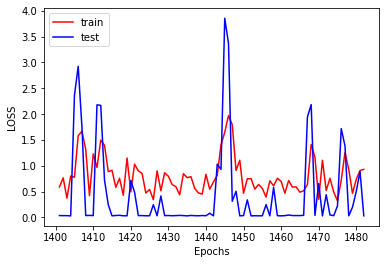

In [89]:
# Graficas de loss
plt.plot(epochs[1400:], loss[1400:], 'r')
plt.plot(epochs[1400:], val_loss[1400:], 'b')
plt.xlabel('Epochs')
plt.ylabel('LOSS')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

With the grafic of accuracy we compare the training part and test part

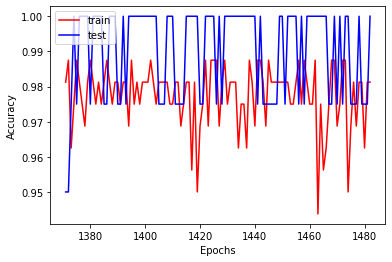

In [94]:
# Graficas de accuracy
plt.plot(epochs[1370:], accuracy[1370:], 'r')
plt.plot(epochs[1370:], val_accuracy[1370:], 'b')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

The next pass is evaluate the test part, we create a function for compare the quantities of asserts and the percentages of assert.

In [62]:
# evaluamos el modelo
scores = model.evaluate(x_train, y)
y_t = []
ls = []
for i in y_test:
    ls = [0 for i in range(6)]
    ls[i] = 1
    y_t.append(ls)
y_t = pd.DataFrame(y_t)
y_predicted = model.predict(x_test).round()

5/5 [==============================] - 0s 3ms/step - loss: 5.4131 - accuracy: 0.9563


In [63]:
stadistics(convert_at_type_array(y_predicted),convert_at_type_array(y_t.to_numpy()))

print(convert_at_type_array(y_predicted))
print(convert_at_type_array(y_t.to_numpy())) 


Cantidad total de pruebas: 40
Cantidad total de aciertos: 38
Porcentaje de aciertos: 95.0%
[5, 0, 1, 0, 2, 2, 2, 0, 4, 5, 5, 2, 4, 0, 0, 4, 2, 0, 5, 2, 1, 5, 1, 2, 5, 2, 4, 0, 1, 3, 5, 4, 2, 3, 0, 4, 1, 1, 2, 1]
[5, 0, 0, 0, 2, 2, 2, 0, 4, 5, 5, 2, 4, 0, 0, 4, 2, 0, 5, 2, 1, 5, 0, 2, 5, 2, 4, 0, 1, 3, 5, 4, 2, 3, 0, 4, 1, 1, 2, 1]


The final pass is save the model. We save the best models in two files (json for the model and h5 file for the weights of the neuronal network).

In [64]:
name = "caso_guardado"

In [65]:
model_json = model.to_json()
with open("./jsons/"+name+".json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("./h_fives/"+name+".h5")
print("Modelo Guardado!")

Modelo Guardado!


We realice many experiments using differents quantity of neourones and layers, changing the activation function also and we obtain differents results for each combination.

We also prove different activation functions and we got the results:
    
bad activation models (the worst functions in descending order): 

softsign, tanh, sigmoid, exponential
    
good activation models (the best functions in descending order):

selu, relu, softplus, softmax, elu


The bad functions of activation took a long time for improve his accuracy while the good activation models improve his accuracy inmediately, also we run the experiments more than one time so we get differents results based on the graphs where we compare accuracy and epochs.

## Results and conclusions

The results for the 7° best experiments are:
#### Experiment 1
190 -> train
 10 -> test 

4 inputs (Temperature, L, R, A_M)

10 neurones in a hidden layer with relu function

6 neurones in the output layer with softmax function

For the compile:

loss ='categorical_crossentropy'

optimizer='adam'

metrics='accuracy'

900 Epochs with 0.7411 of accuracy.

90% of asserts in the test part.
![Types](images/Exp1.jpg)

#### Experiment 2
160 -> train
 40 -> test 

4 inputs (Temperature, L, R, A_M)

10 neurones in a hidden layer with selu function

6 neurones in the output layer with softmax function

For the compile:

loss ='categorical_crossentropy'

optimizer='adam'

metrics='accuracy'

1000 Epochs with 0.9750 of accuracy.

100.0% of asserts in the test part.
![Types](images/Exp2.jfif)
#### Experiment 3
160 -> train
 40 -> test

24 inputs (Temperature, L, R, A_M,
whitish,red,pale yellow orange,white-yellow,blue,yellow-white,yellowish,yellowish white,orange-red,orange,white,blue white,blue-white,
O, F, G, K, A, M, B)

10 neurones in a hidden layer with selu function

6 neurones in the output layer with softmax function

For the compile:

loss ='categorical_crossentropy'

optimizer='adam'

metrics='accuracy'

1482 Epochs with 0.9688 of accuracy.

100% of asserts in the test part.

![Types](images/Exp3.jfif)
#### Experiment 4

160 -> train
 40 -> test 

24 inputs (Temperature, L, R, A_M,
whitish,red,pale yellow orange,white-yellow,blue,yellow-white,yellowish,yellowish white,orange-red,orange,white,blue white,blue-white,
O, F, G, K, A, M, B)

10 neurones in a hidden layer with elu function

6 neurones in the output layer with softmax function

For the compile:

loss ='categorical_crossentropy'

optimizer='adam'

metrics='accuracy'

2000 Epochs with 0.9625 of accuracy.

100% of asserts in the test part.
![Types](images/Exp4.jfif)
#### Experiment 5

160 -> train
 40 -> test 

24 inputs (Temperature, L, R, A_M,
whitish,red,pale yellow orange,white-yellow,blue,yellow-white,yellowish,yellowish white,orange-red,orange,white,blue white,blue-white,
O, F, G, K, A, M, B)

64 neurones in a hidden layer with selu function

32 neurones in the output layer with relu function

6 neurones in the output layer with softmax function

For the compile:

loss ='categorical_crossentropy'

optimizer='adam'

metrics='accuracy'

4000 Epochs with 0.9563 of accuracy.

97.5% of asserts in the test part.
![Types](images/Exp5.jfif)
#### Experiment 6

160 -> train
 40 -> test 

3 inputs (L, R, A_M)

64 neurones in a hidden layer with selu function

32 neurones in the output layer with relu function

6 neurones in the output layer with softmax function

For the compile:

loss ='categorical_crossentropy'

optimizer='adam'

metrics='accuracy'

2000 Epochs with 0.9125  of accuracy.

97.5% of asserts in the test part.
![Types](images/Exp6.jfif)
#### Experiment 7

160 -> train
 40 -> test 

3 inputs (L, R, A_M)

64 neurones in a hidden layer with selu function

6 neurones in the output layer with softmax function

For the compile:

loss ='categorical_crossentropy'

optimizer='adam'

metrics='accuracy'

2000 Epochs with 0.9688  of accuracy.

95.0% of asserts in the test part.
![Types](images/Exp7.jfif)

When we save all the results we compare all the cases with the best score, the 3° experiment get the best result to be applied and we use this for the competition.
For the experiments we test mainly with 3 types of input, only the numerics, all the columns and the 3 best columns based on covariance.
The best models are those that applied all the columns and had the smallest graph architecture, see 3° experiment which turned out to be the best of the 7° experiments obtained.
It is important to mention that the amount of high epoch helps to find a good neural network even though it takes a long time to model when performing epochs are recommended because you get better results and you have a better range to see where the epochs got a better accuracy in the graphs of losses and epochs which helped a lot to obtain the best result.

### Bibliografy
#### Open a CSV
https://code.tutsplus.com/es/tutorials/how-to-read-and-write-csv-files-in-python--cms-29907
#### Save in a dataframe pandas
https://realpython.com/pandas-python-explore-dataset/
#### Aleatory values for a list 
ttps://www.iteramos.com/pregunta/17907/la-mejor-manera-de-aleatorizar-una-lista-de-cuerdas-en-python

#### excel
https://gonzalezgouveia.com/como-exportar-data-frames-de-pandas-a-csv-o-excel-en-python/
https://www.delftstack.com/es/howto/python-pandas/pandas-remove-index/#:~:text=Si%20queremos%20eliminar%20la%20columna,en%20el%20m%C3%A9todo%20reset_index()%20
#### dataframe  
https://www.codigopiton.com/como-crear-un-dataframe-con-pandas-y-python/
#### concatenar dataframes
https://www.analyticslane.com/2018/09/10/unir-y-combinar-dataframes-con-pandas-en-python/

#### Covariance with its explanation and application
https://www.sdelsol.com/glosario/covarianza/

#### Correlation with its explanation and application
https://www.maximaformacion.es/blog-dat/que-es-la-correlacion-estadistica-y-como-interpretarla/